In [4]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# load subjets to directory

data_dir = 'abide_timeseries/aal_csv'
subject_data = []

for filename in os.listdir(data_dir):
    if filename.endswith('csv'):
        df = pd.read_csv(os.path.join(data_dir, filename), skiprows=[1], header=None)
        subject_data.append(df)

print(f"Loaded {len(subject_data)} subjects.")

Loaded 1102 subjects.


In [6]:
sample = subject_data[0]

print(sample.head())
print(sample.columns)

        0         1         2         3         4         5         6    \
0  0.000000  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   
1 -2.539332  2.747596  1.182977  2.538651  1.886804  4.915048 -1.472812   
2 -2.321754 -0.034424  1.901878  2.098236  2.484421  4.541738 -1.293605   
3 -0.643494 -3.851515  0.935755 -0.919723  1.869644  3.129760 -0.634238   
4  2.144931 -4.198091 -1.795584 -5.477897  0.075232  1.585569 -0.260361   

         7         8         9    ...         106         107         108  \
0   7.000000  8.000000  9.000000  ...  106.000000  107.000000  108.000000   
1  -4.845733  2.549744  2.846306  ...    0.062848    5.767680    6.055776   
2  -6.678593  3.060671  0.659669  ...    1.962496    2.487070    4.908680   
3  -8.329076  2.016206 -1.119380  ...    1.941306   -3.747752   -1.473718   
4 -10.644937 -0.484480 -3.468358  ...   -0.262721   -7.625118   -5.092815   

          109         110         111         112         113         114  \
0  109.00

Shape:  (147, 116)
              0           1           2           3           4           5    \
count  147.000000  147.000000  147.000000  147.000000  147.000000  147.000000   
mean     0.098506    0.104244    0.013702   -0.004202    0.061056    0.065307   
std      5.670523    6.737496    5.222714    5.255875    3.272726    4.055791   
min    -13.902729  -16.733416  -13.984674  -12.059325   -8.287431   -9.567423   
25%     -4.526361   -4.816340   -3.214688   -3.804977   -2.001923   -2.817330   
50%      0.729206    0.344812    0.886855   -0.232295    0.562398   -0.067760   
75%      4.166395    4.741502    3.117633    3.434792    2.397227    2.353436   
max     17.152925   17.483114   10.846116   11.204133    6.422791   11.513682   

              6           7           8           9    ...         106  \
count  147.000000  147.000000  147.000000  147.000000  ...  147.000000   
mean     0.038677    0.056101   -0.010816    0.047933  ...    0.659956   
std      4.534667    9.411398

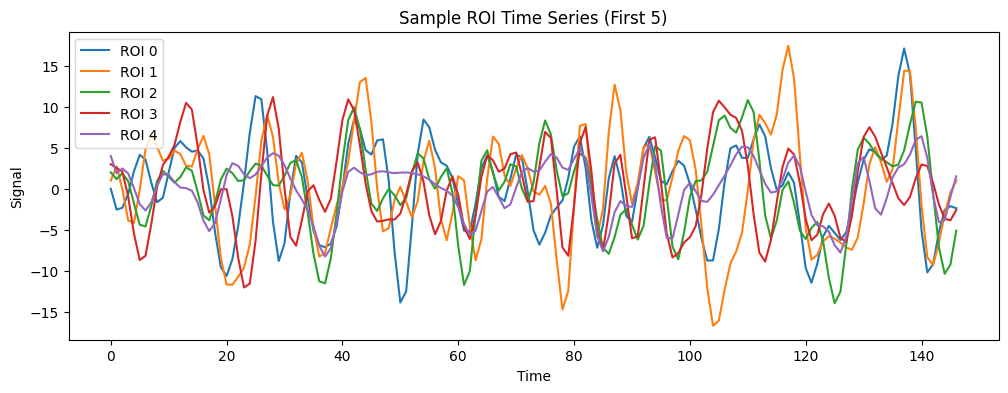

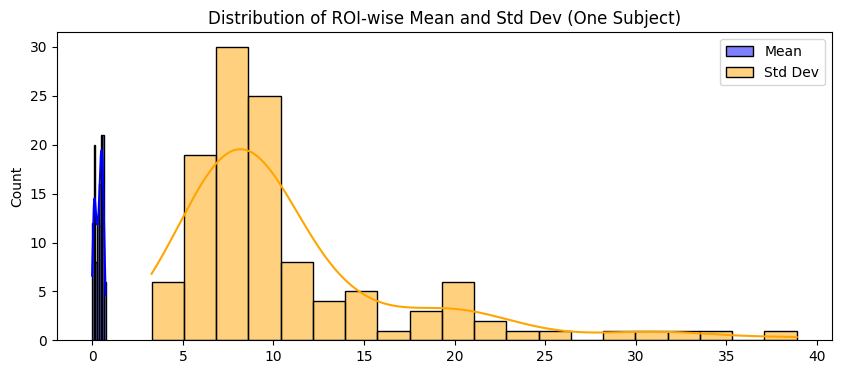

In [7]:
# check first/one subject

print("Shape: ", sample.shape)
print(sample.describe())

plt.figure(figsize=(12, 4))
for col in sample.columns[:5]:
    plt.plot(sample.index, sample[col], label=col)

plt.title("Sample ROI Time Series (First 5)")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend([f"ROI {i}" for i in range(5)])
plt.show()

mean_signal = sample.mean(axis=0)
std_signal = sample.std(axis=0)

plt.figure(figsize=(10, 4))
sns.histplot(mean_signal, kde=True, label="Mean", color="blue")
sns.histplot(std_signal, kde=True, label="Std Dev", color="orange")
plt.title("Distribution of ROI-wise Mean and Std Dev (One Subject)")
plt.legend()
plt.show()

Timepoints per Subject:
count    1102.000000
mean      195.950091
std        58.302776
min        79.000000
25%       153.000000
50%       197.000000
75%       237.000000
max       317.000000
dtype: float64
Mode: 177
Number of subjects with ≥ 140 timepoints: 927


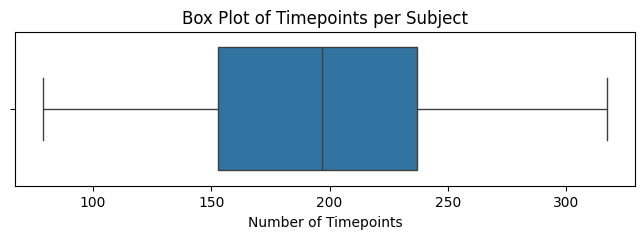

In [8]:
# overall shape timepoints

# Get number of rows (timepoints) for each subject
timepoints = [df.shape[0] for df in subject_data]

# Convert to a pandas Series for easy statistics
tp_series = pd.Series(timepoints)

# Show summary stats
print("Timepoints per Subject:")
print(tp_series.describe())

# Show mode (most common timepoint count)
mode = tp_series.mode().values
print(f"Mode: {mode[0]}")

count_140_or_more = (tp_series >= 140).sum()
print(f"Number of subjects with ≥ 140 timepoints: {count_140_or_more}")

plt.figure(figsize=(8, 2))
sns.boxplot(x=tp_series, orient='h')
plt.title("Box Plot of Timepoints per Subject")
plt.xlabel("Number of Timepoints")
plt.show()

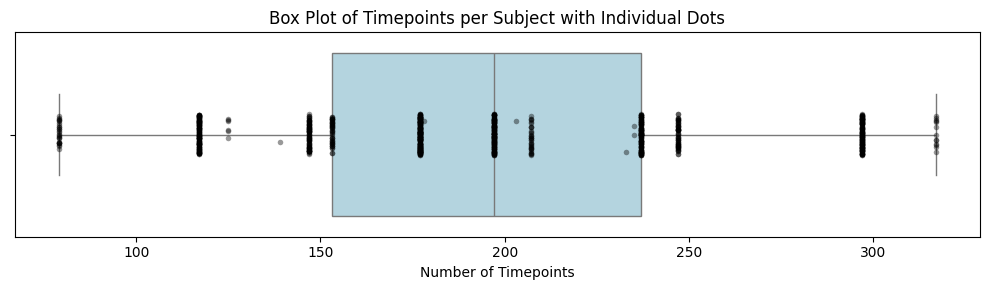

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate timepoints
timepoints = [df.shape[0] for df in subject_data]
tp_series = pd.Series(timepoints)

# Step 2: Boxplot + individual subject dots
plt.figure(figsize=(10, 3))

sns.boxplot(x=tp_series, color='lightblue', fliersize=0)  # fliersize=0 hides built-in outliers
sns.stripplot(x=tp_series, color='black', size=4, jitter=True, alpha=0.4)  # individual dots

plt.title("Box Plot of Timepoints per Subject with Individual Dots")
plt.xlabel("Number of Timepoints")
plt.tight_layout()
plt.show()


In [10]:
# notes
# second row is metadata probably ROI id or something so we skip
# columns are ROIs (evidenced by the number, aal atlas has 116 ROIs and each csv contains 116 columns)
# rows are timesteps (min is 79 while max is 317 mean is 195)